## Mean/ Median Imputation 


1. Replacing the missing value with Mean and Median
2. Most standard practice is to go with mean if variable has a Gaussian    Distribution or Median if the variable has a skewed distribution.
3. It's used considering data is missing completely at random and data missing is less than 5%.
4. Disadvantages of using this are as follows :
    - Distortion of the original variable distribution if the fraction of NA is large
    - Distortation of Variance 
    - Distortation of the covariance with other variables of the
         dataset.


In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

In [10]:
data = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])
data

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [11]:
data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [13]:
# NOTE : Imputation sholuld be alwayas done with the train data mean 
# and Median on both the train and test dataset.


X_train, X_test, y_train, y_test = train_test_split(
    data[['Age', 'Fare']],  # predictors
    data['Survived'],  # target
    test_size=0.5,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((445, 2), (446, 2))

In [14]:
X_train.isnull().mean()

Age     0.191011
Fare    0.000000
dtype: float64

In [16]:
# Calculate the median Age.

median = X_train.Age.median()
median

28.0

In [18]:
# Calculate the mean Age

mean = X_train.Age.mean()

# The mean contains many decimals, so I round to

# using the round function from numpy.
mean = np.round(mean, 1)

mean

29.2

In [20]:
# Create a new variable with the missing values replaced
# using the function we created above.

# First, replace with the median.
X_train['Age_median'] = X_train['Age'].fillna(median)

# Now replace with the mean.
X_train['Age_mean'] = X_train['Age'].fillna(mean)

X_train.head(15)

,Age,Fare,Age_median,Age_mean
213,30.0,13.0000,30.0,30.0
586,47.0,15.0000,47.0,47.0
499,24.0,7.7958,24.0,24.0
821,27.0,8.6625,27.0,27.0
246,25.0,7.7750,25.0,25.0
861,21.0,11.5000,21.0,21.0
546,19.0,26.0000,19.0,19.0
125,12.0,11.2417,12.0,12.0
135,23.0,15.0458,23.0,23.0
466,NaN,0.0000,28.0,29.2


In [22]:
#check variance of data 

print('Original variable variance: ', X_train['Age'].var())
print('Variance after median imputation: ', X_train['Age_median'].var())
print('Variance after mean imputation: ', X_train['Age_mean'].var())

Original variable variance:  200.34420723537602
Variance after median imputation:  162.2173682184432
Variance after mean imputation:  161.9900441977933


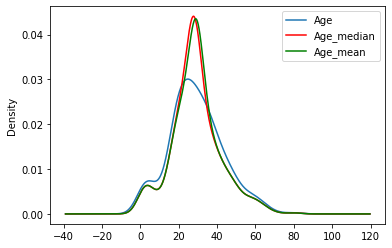

In [23]:
# We can see that the distribution has changed:
# there are now more values towards the median
# or median.

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [24]:

X_train[['Fare', 'Age', 'Age_median', 'Age_mean']].cov()

,Fare,Age,Age_median,Age_mean
Fare,2712.273441,78.684453,67.103727,63.654284
Age,78.684453,200.344207,200.344207,200.344207
Age_median,67.103727,200.344207,162.217368,161.992197
Age_mean,63.654284,200.344207,161.992197,161.990044


<AxesSubplot:>

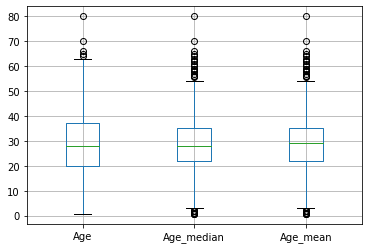

In [26]:
# mean / median imputation may lead inliers to look like outliers.

# In other words, mean / median imputation may lead to an increase
# in the number of detected outliers.

# Let's find out using a boxplot.
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()